<a href="https://colab.research.google.com/github/FajarKKP/CodingPractice/blob/main/Transfer_learning_Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150,150,3),
                                include_top=False,
                                weights = None
                                )

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2021-05-08 09:48:28--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   102MB/s    in 0.8s    

2021-05-08 09:48:29 (102 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


In [2]:
# Make the model
from tensorflow.keras.optimizers import RMSprop
#Because we used a trained set, we can now work to our model
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation=tf.nn.relu)(x)
x = layers.Dropout(0.2)(x)   #Using the droput. In this case, 20% of the neuron will be dropped               
x = layers.Dense  (1, activation=tf.nn.sigmoid)(x)  
model = Model( pre_trained_model.input, x) 

model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Now, we are processing the ImageDataGenerator

In [3]:
#Download the cats and dogs tempelate
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

--2021-05-08 09:48:38--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  77.9MB/s    in 0.8s    

2021-05-08 09:48:39 (77.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')

zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

#Set their directory
train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

#Add Data augmentation to our training data
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale=1/255)

#Flow our our datagen
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size = (150,150)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode = 'binary',
    target_size = (150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/20
100/100 - 141s - loss: 0.3931 - accuracy: 0.8580 - val_loss: 0.1088 - val_accuracy: 0.9550
Epoch 2/20
100/100 - 136s - loss: 0.2038 - accuracy: 0.9160 - val_loss: 0.1182 - val_accuracy: 0.9560
Epoch 3/20
100/100 - 136s - loss: 0.2160 - accuracy: 0.9195 - val_loss: 0.1536 - val_accuracy: 0.9410
Epoch 4/20
100/100 - 137s - loss: 0.2008 - accuracy: 0.9325 - val_loss: 0.1344 - val_accuracy: 0.9490
Epoch 5/20
100/100 - 137s - loss: 0.1835 - accuracy: 0.9335 - val_loss: 0.1956 - val_accuracy: 0.9290
Epoch 6/20
100/100 - 137s - loss: 0.1859 - accuracy: 0.9330 - val_loss: 0.1006 - val_accuracy: 0.9660
Epoch 7/20
100/100 - 137s - loss: 0.1795 - accuracy: 0.9370 - val_loss: 0.1131 - val_accuracy: 0.9660
Epoch 8/20
100/100 - 137s - loss: 0.1734 - accuracy: 0.9450 - val_loss: 0.1247 - val_accuracy: 0.9610
Epoch 9/20
100/100 - 137s - loss: 0.1765 - accuracy: 0.9395 - val_loss: 0.1001 - val_accuracy: 0.9720
Epoch 10/20
100/100 - 137s - loss: 0.1570 - accuracy: 0.9485 - val_loss: 0.1757 - 

In [ ]:
# Now draw the plot

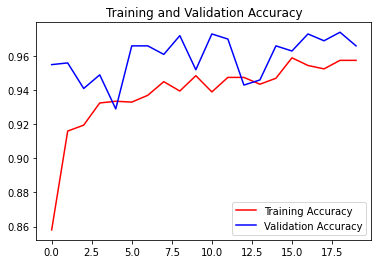

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,'r', label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()